"Graduate Admission Insights: A Visual Data Exploration"

Objective 1: Find Correlation Between Features

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Admission Chance.csv") 
df.describe() 
df.info()
df = df.drop(columns=['Serial No']) 

df.rename(columns={'Chance of Admit ': 'Chance of Admit'}, inplace=True)

df.fillna(df.mean(), inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          543 non-null    int64  
 1   GRE Score          543 non-null    int64  
 2   TOEFL Score        543 non-null    int64  
 3   University Rating  543 non-null    int64  
 4    SOP               543 non-null    float64
 5   LOR                543 non-null    float64
 6   CGPA               543 non-null    float64
 7   Research           543 non-null    int64  
 8   Chance of Admit    543 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 38.3 KB


In [3]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,316.458564,107.327808,3.047882,3.388582,3.447514,8.593591,0.526703,0.719945
std,11.446234,6.017142,1.115767,1.025963,0.886298,0.592746,0.499747,0.141565
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.180000,0.000000,0.630000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.600000,1.000000,0.720000
75%,325.000000,111.000000,4.000000,4.000000,4.000000,9.065000,1.000000,0.820000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          543 non-null    int64  
 1   TOEFL Score        543 non-null    int64  
 2   University Rating  543 non-null    int64  
 3    SOP               543 non-null    float64
 4   LOR                543 non-null    float64
 5   CGPA               543 non-null    float64
 6   Research           543 non-null    int64  
 7   Chance of Admit    543 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 34.1 KB


In [6]:
# objective 1 modified
# Drop Serial No to avoid misleading correlations
df = df.drop(columns=['Serial No'])

corr_matrix = df.corr()

# Set plot size and style
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Admission Features", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

KeyError: "['Serial No'] not found in axis"

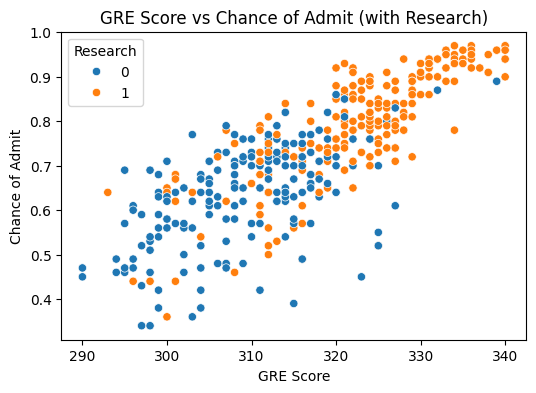

In [ ]:
# Objective 2: Analyze the Effect of GRE Score on Admission

plt.figure(figsize=(6, 4))
sns.scatterplot(x='GRE Score', y='Chance of Admit', hue='Research', data=df)
plt.title('GRE Score vs Chance of Admit (with Research)')
plt.show()


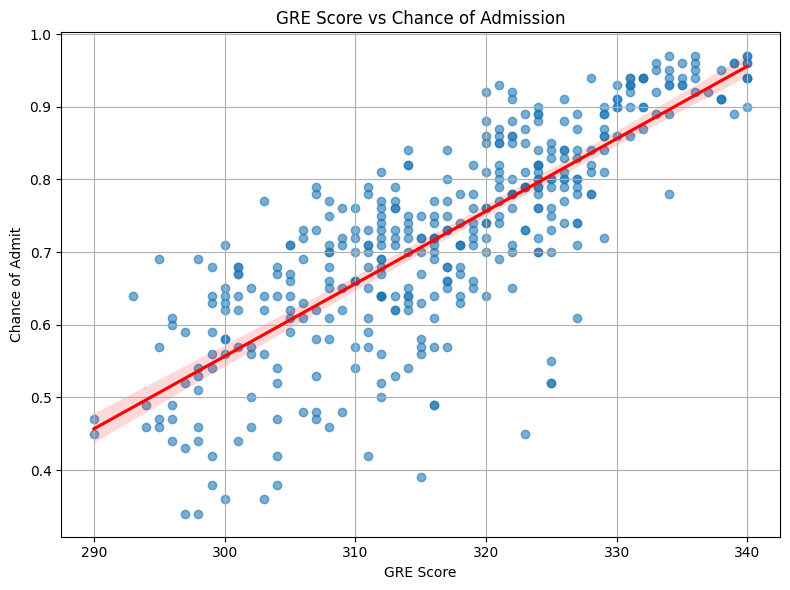

Correlation between GRE Score and Chance of Admit: 0.803


In [ ]:
# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Drop Serial No
# df.drop(columns=["Serial No"], inplace=True)

# Plot GRE Score vs Chance of Admit
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x="GRE Score", y="Chance of Admit", scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("GRE Score vs Chance of Admission")
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate correlation
gre_corr = df["GRE Score"].corr(df["Chance of Admit"])
print(f"Correlation between GRE Score and Chance of Admit: {gre_corr:.3f}")

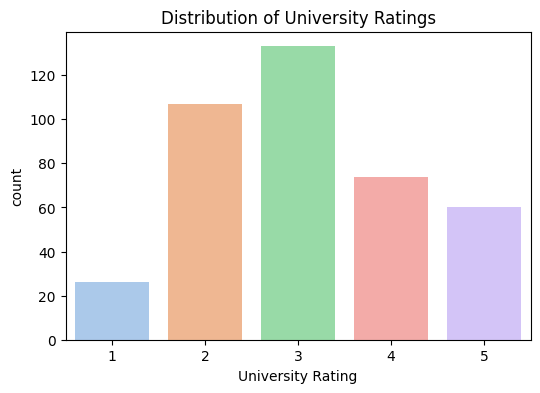

In [ ]:
# Objective 3: Distribution of University Ratings

plt.figure(figsize=(6, 4))
sns.countplot(x='University Rating', data=df, hue='University Rating', palette='pastel', legend=False)
plt.title('Distribution of University Ratings')
plt.show()


C:\Users\learn\AppData\Local\Temp\ipykernel_16916\2474135497.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="University Rating", palette="viridis")


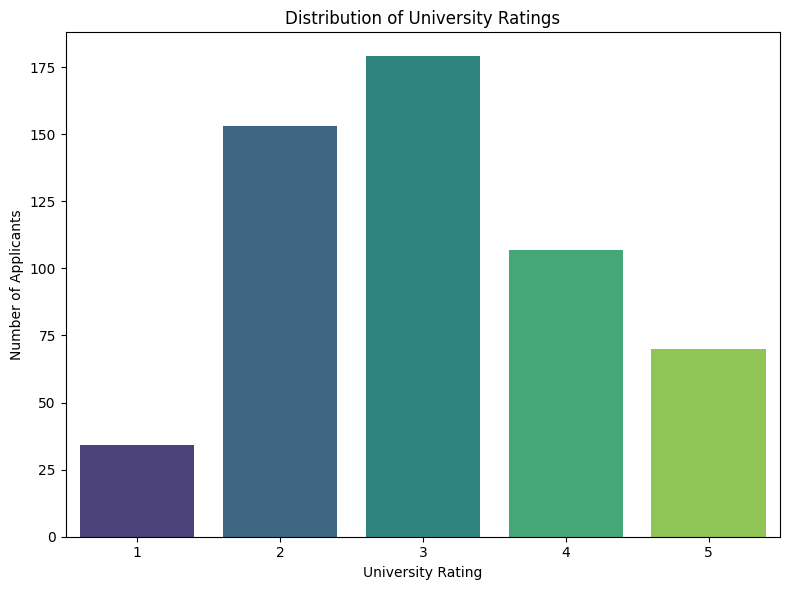

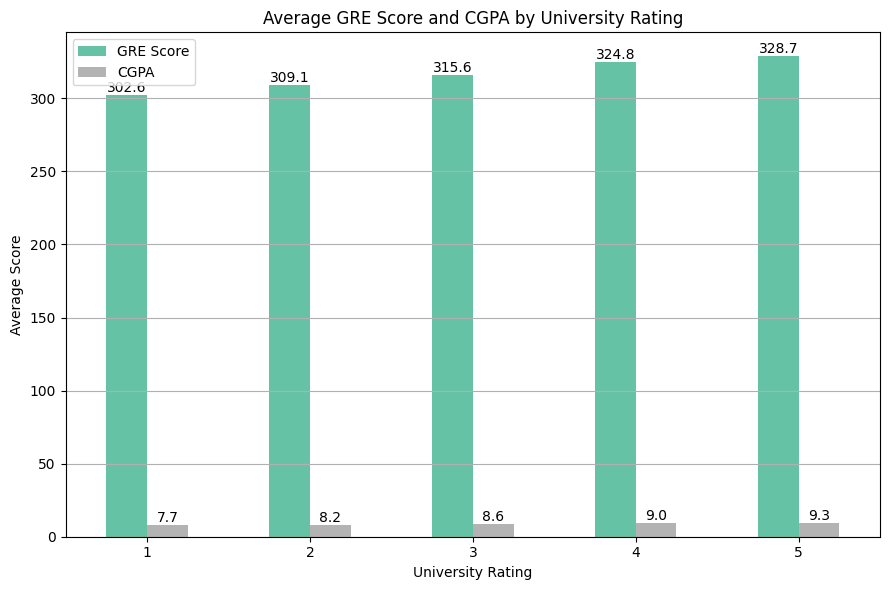

In [ ]:

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x="University Rating", palette="viridis")


plt.title("Distribution of University Ratings")
plt.xlabel("University Rating")
plt.ylabel("Number of Applicants")

plt.tight_layout()
plt.show()

avg_scores = df.groupby("University Rating")[["GRE Score", "CGPA"]].mean().reset_index()

ax = avg_scores.plot(
    x="University Rating", 
    kind="bar", 
    figsize=(9, 6), 
    colormap="Set2", 
    title="Average GRE Score and CGPA by University Rating"
)

# Add data labels on each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}', (bar.get_x() + bar.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



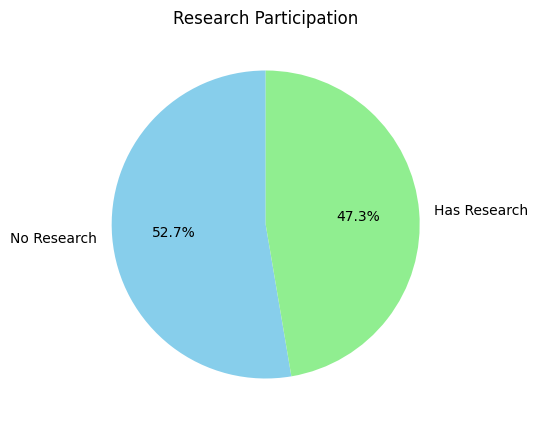

In [10]:
# Objective 4: Percentage of Students with Research Experience
research_counts = df['Research'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(research_counts, labels=['No Research', 'Has Research'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Research Participation')
plt.show()


C:\Users\learn\AppData\Local\Temp\ipykernel_16916\2552861564.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=research_counts.values, palette=colors)


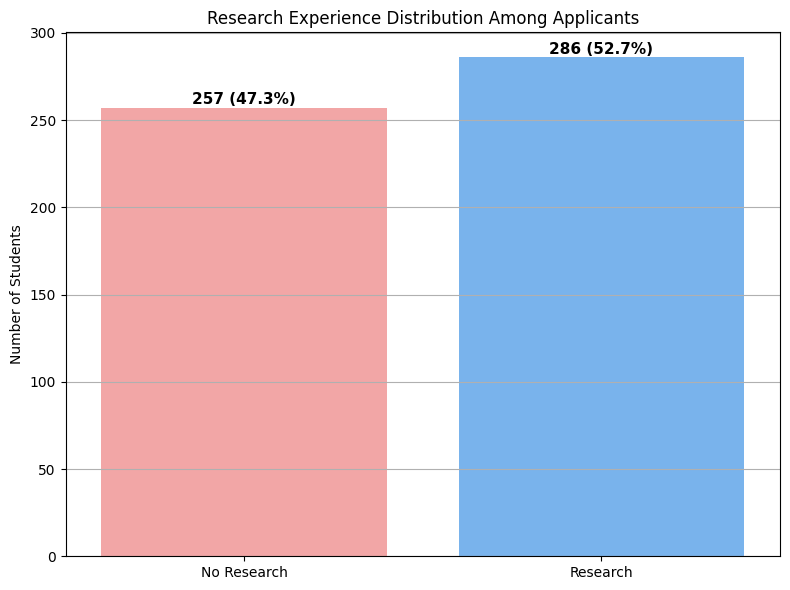

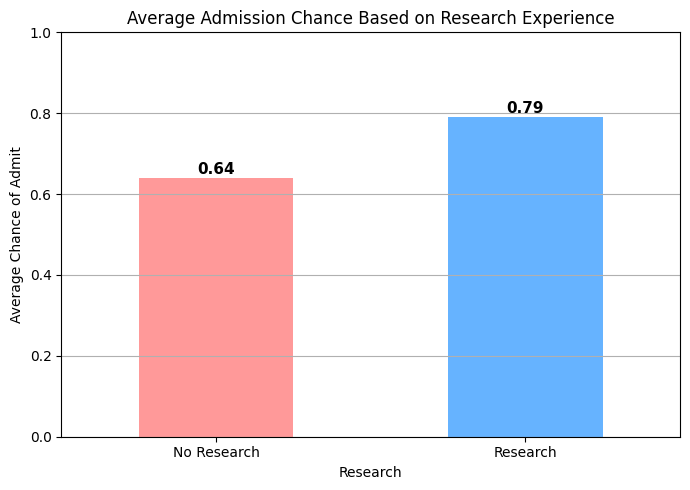

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count how many have done research (1) and haven't (0)
research_counts = df['Research'].value_counts().sort_index()

# Bar Plot with percentages
labels = ['No Research', 'Research']
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=labels, y=research_counts.values, palette=colors)

# Add data labels with percentage
total = research_counts.sum()
for i, count in enumerate(research_counts):
    percent = count / total * 100
    ax.text(i, count + 2, f'{count} ({percent:.1f}%)', ha='center', fontsize=11, fontweight='bold')

plt.title("Research Experience Distribution Among Applicants")
plt.ylabel("Number of Students")
plt.grid(axis='y')
plt.tight_layout()
plt.show()








# Compare average chance of admit for students with and without research
avg_chance = df.groupby('Research')['Chance of Admit'].mean()

# Bar Plot
plt.figure(figsize=(7, 5))
ax = avg_chance.plot(kind='bar', color=['#ff9999', '#66b3ff'])

# Add data labels
for i, val in enumerate(avg_chance):
    ax.text(i, val + 0.01, f'{val:.2f}', ha='center', fontsize=11, fontweight='bold')

plt.title("Average Admission Chance Based on Research Experience")
plt.xticks([0, 1], ['No Research', 'Research'], rotation=0)
plt.ylabel("Average Chance of Admit")
plt.ylim(0, 1)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


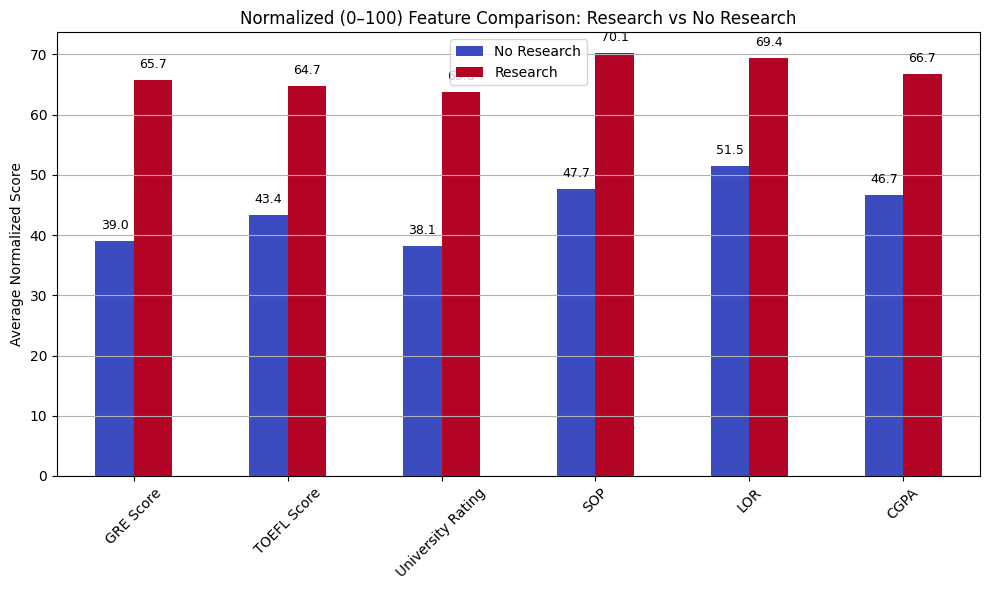

In [ ]:
# eXTENDED objective 4 
# who do research
import matplotlib.pyplot as plt

# Clean column names
df.columns = df.columns.str.strip()

# Select feature columns
feature_cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']

# Normalize each feature to 0–100 scale using Min-Max scaling
df_normalized = df.copy()
for col in feature_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    df_normalized[col] = ((df[col] - min_val) / (max_val - min_val)) * 100

# Group by Research and calculate average of normalized features
research_profile = df_normalized.groupby('Research')[feature_cols].mean().T
research_profile.columns = ['No Research', 'Research']

# Plot the grouped bar chart
ax = research_profile.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')

# Add value labels on each bar
for p in ax.patches:
    value = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, value + 1.5, f'{value:.1f}',
            ha='center', va='bottom', fontsize=9, color='black')

plt.title("Normalized (0–100) Feature Comparison: Research vs No Research")
plt.ylabel("Average Normalized Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


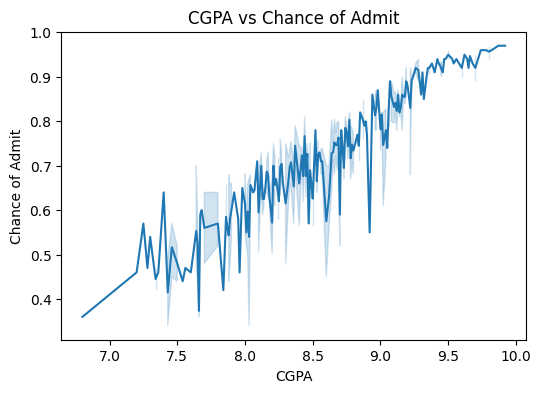

In [ ]:
# Objective 5: Relationship Between CGPA and Admission

df_sorted = df.sort_values('CGPA')
plt.figure(figsize=(6, 4))
sns.lineplot(x='CGPA', y='Chance of Admit', data=df_sorted)
plt.title('CGPA vs Chance of Admit')
plt.show()

📌 Overall Correlation between CGPA and Chance of Admit: 0.87


<Figure size 1000x600 with 0 Axes>

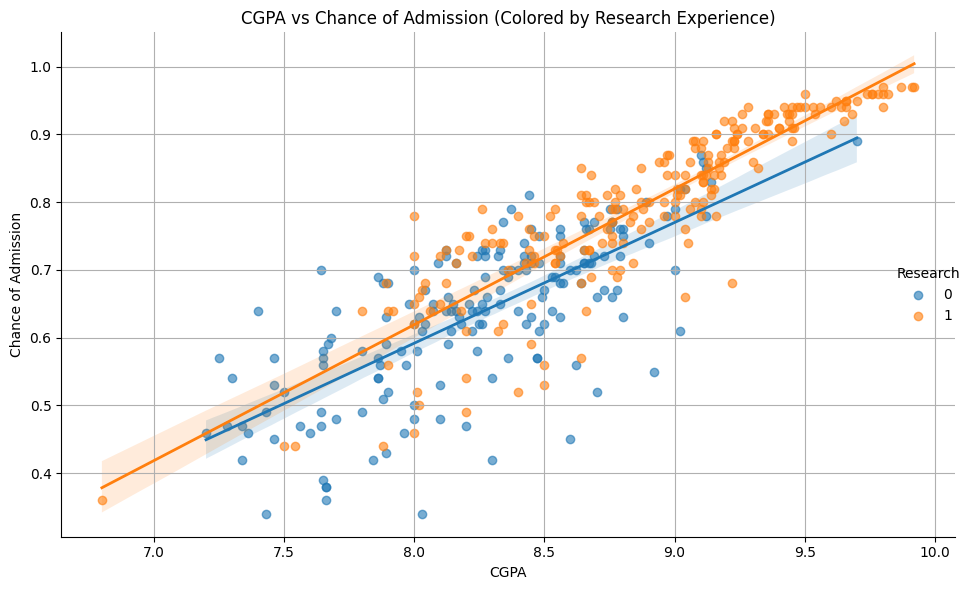

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean column names
df.columns = df.columns.str.strip()

# Correlation Coefficient (overall)
correlation = df['CGPA'].corr(df['Chance of Admit'])
print(f"📌 Overall Correlation between CGPA and Chance of Admit: {correlation:.2f}")

# Create a colored scatter plot with regression line for each Research category
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='CGPA', y='Chance of Admit', hue='Research', 
           height=6, aspect=1.5, scatter_kws={'alpha':0.6}, line_kws={'linewidth':2})

plt.title("CGPA vs Chance of Admission (Colored by Research Experience)")
plt.xlabel("CGPA")
plt.ylabel("Chance of Admission")
plt.grid(True)
plt.tight_layout()
plt.show()


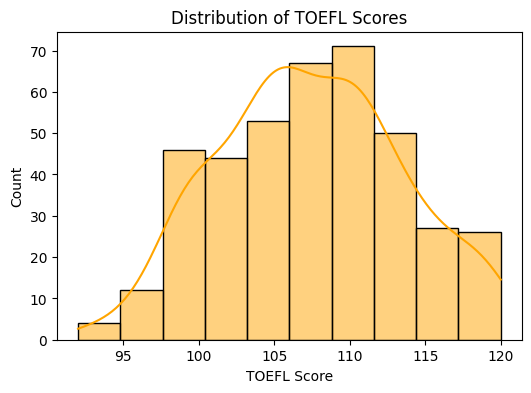

In [ ]:
# Bonus Objective 6: Distribution of TOEFL Scores
plt.figure(figsize=(6, 4))
sns.histplot(df['TOEFL Score'], bins=10, kde=True, color='orange')
plt.title('Distribution of TOEFL Scores')
plt.show()



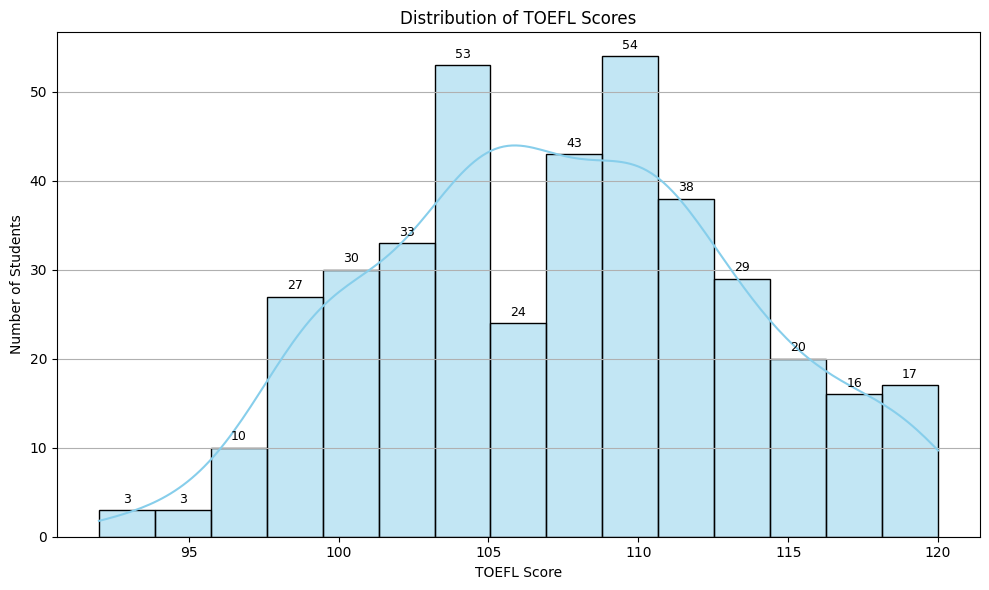

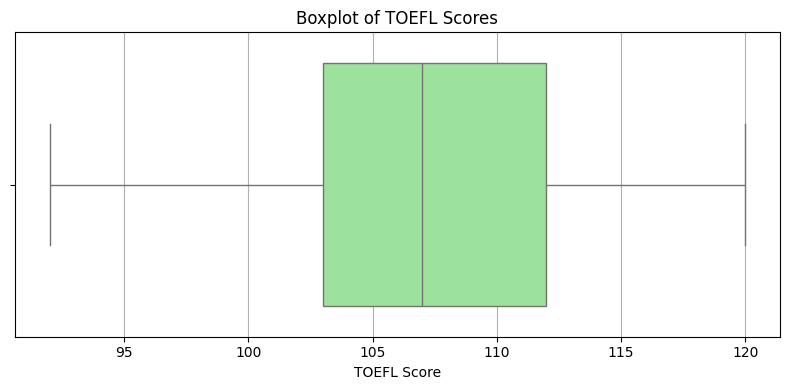

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean column names
df.columns = df.columns.str.strip()

# Histogram with KDE and value labels
plt.figure(figsize=(10, 6))
hist = sns.histplot(df['TOEFL Score'], kde=True, bins=15, color='skyblue', edgecolor='black')

# Add data labels on bars
for patch in hist.patches:
    height = patch.get_height()
    if height > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, height + 0.5,
                 int(height), ha='center', va='bottom', fontsize=9, color='black')

plt.title("Distribution of TOEFL Scores")
plt.xlabel("TOEFL Score")
plt.ylabel("Number of Students")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Boxplot to check for outliers
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='TOEFL Score', color='lightgreen')
plt.title("Boxplot of TOEFL Scores")
plt.grid(axis='x')
plt.tight_layout()
plt.show()
